In [1]:
!pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tqdm

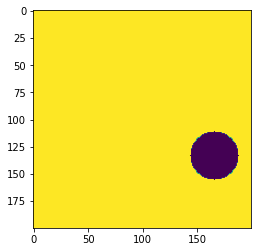

In [9]:
image_size = 200
rad = random.randint(5,50)
c_x = random.randint(rad, image_size-rad) 
c_y = random.randint(rad, image_size-rad)
blank_image = np.ones(shape= [image_size, image_size], dtype= np.uint8)
cv2.circle(blank_image, (c_x,c_y), rad, 0 , -1)
plt.imshow(blank_image)

In [13]:
def create_training_data():
    I = 10000;
    x_train = np.zeros(shape=[I, image_size, image_size,1])
    y_train = np.zeros(shape=[I,3])
    
    for i in range(I):
        rad = random.randint(5,50) # 5~50 랜덤으로 반지름값 지정
        c_x = random.randint(rad, image_size-rad)
        c_y = random.randint(rad, image_size-rad)
        
        # x좌표, y좌표, 반지름 정규화-> 0~1 사이값
        y_train[i,0] = c_x/image_size 
        y_train[i,1] = c_y/image_size
        y_train[i,2] = rad/image_size
        
        # 흰도화지 생성
        blank_image = np.ones(shape = [image_size,image_size], dtype=np.uint8)
        # 흰도화지에 원 그리기!
        x_train[i,:,:,0] = cv2.circle(blank_image, (c_x, c_y), rad, 0, -1)
        
    return {'x_train': x_train, 'y_train': y_train}

In [14]:
training_data = create_training_data()

In [15]:
training_data

{'x_train': array([[[[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         ...,
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]]],
 
 
        [[[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          ...,
          [1.],
          [1.],
          [1.]],
 
         [[1.],
          [1.],
          [1.],
          

In [45]:
training_data['x_train'][0][0]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

array([158., 152.,   6.])

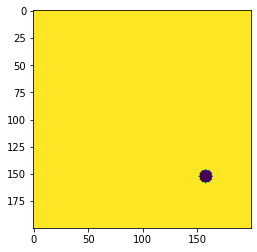

In [18]:
plt.imshow(training_data['x_train'][300].reshape(200,200))
image_size*training_data['y_train'][300]

In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [26]:
img_input = layers.Input(shape=(image_size, image_size, 1))

with tf.device('/GPU:0'):
    x = layers.Conv2D(5,3,activation='relu', strides=1, padding='same')(img_input) # filter 5개 3*3
    x = layers.MaxPool2D(pool_size=2)(x)
    x = layers.Conv2D(10,3,activation='relu', strides=1)(x)
    x = layers.MaxPool2D(pool_size=2)(x)
    x = layers.Conv2D(20,3,activation='relu', strides=1)(x)
    x = layers.MaxPool2D(pool_size=2)(x)
    x = layers.Conv2D(3,5,activation='relu', strides=1)(x)
    x = layers.MaxPool2D(pool_size=2)(x)

    x = layers.Flatten()(x)

    output = layers.Dense(3, activation='relu')(x)

    model = Model(img_input, output)

    model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 200, 200, 5)       50        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 100, 5)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 98, 98, 10)        460       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 49, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 47, 47, 20)        1820

In [27]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [28]:
model.fit(training_data['x_train'], training_data['y_train'], epochs=3, verbose=1)

Epoch 1/3
313/313 [==============================] - 17s 9ms/step - loss: 0.0211 - mse: 0.0211
Epoch 2/3
313/313 [==============================] - 3s 9ms/step - loss: 0.0077 - mse: 0.0077
Epoch 3/3
313/313 [==============================] - 3s 9ms/step - loss: 0.0053 - mse: 0.0053


In [31]:
# x좌표 y좌표 반지름 예측
preds = model.predict(training_data['x_train'][3].reshape(1, image_size,image_size,1))

In [32]:
# 예측값
preds * image_size

array([[55.25359 , 57.472443, 36.471333]], dtype=float32)

In [34]:
# 실제값
image_size * training_data['y_train'][3]

array([64., 62., 37.])

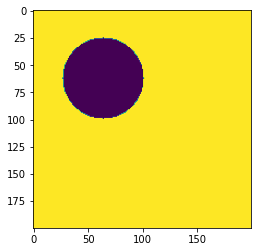

In [35]:
plt.imshow(training_data['x_train'][3].reshape(200,200))